# Regresion Lineal Regularizada

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

In [3]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
total_data.head()

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2                 12.865239  ...         2373                 19.7   
3                 13.897321  ...         1789                 14.1   
4                 11.901798  ...         4661                 13.5   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                   11.9                   13.8             5462   
1                   11.0                   13.1            20520   
2                   18.6                   20.6             3870   
3                   13.2                   14.9             2511   
4                   12.6                   14.5             6017   

   CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0             3.1               2.9               3.3        1326   
1             3.2               3.0               3.5        5479   
2             4.5               4.2               4.8         887   
3             3.3               3.1               3.6         595   
4             3.4               3.2               3.7        1507   

   Urban_rural_code  
0                 3  
1                 4  
2                 6  
3                 2  
4                 2  

[5 rows x 108 columns]

## Exploración y Limpieza

In [4]:
total_data.shape

(3140, 108)

In [5]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [6]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2                 12.865239  ...         2373                 19.7   
3                 13.897321  ...         1789                 14.1   
4                 11.901798  ...         4661                 13.5   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                   11.9                   13.8             5462   
1                   11.0                   13.1            20520   
2                   18.6                   20.6             3870   
3                   13.2                   14.9             2511   
4                   12.6                   14.5             6017   

   CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0             3.1               2.9               3.3        1326   
1             3.2               3.0               3.5        5479   
2             4.5               4.2               4.8         887   
3             3.3               3.1               3.6         595   
4             3.4               3.2               3.7        1507   

   Urban_rural_code  
0                 3  
1                 4  
2                 6  
3                 2  
4                 2  

[5 rows x 108 columns]

In [12]:
columnas_categoricas = total_data.select_dtypes(include=['object']).columns
columnas_categoricas

Index(['COUNTY_NAME', 'STATE_NAME'], dtype='object')

In [13]:
total_data["COUNTY_NAME"] = pd.factorize(total_data["COUNTY_NAME"])[0]
total_data["STATE_NAME"] = pd.factorize(total_data["STATE_NAME"])[0]

total_data.head

<bound method NDFrame.head of        fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964  

In [14]:
numeric_columns = total_data.select_dtypes(include=['int', 'float']).columns.tolist()

In [15]:
total_data.describe()

fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
75%    45081.500000  6.791300e+04  8.097000e+03               12.951840   
max    56045.000000  1.010552e+07  1.208253e+06               25.460677   

             19-Oct  10-19 y/o % of total pop         20-29  \
count  3.140000e+03               3140.000000  3.140000e+03   
mean   1.336798e+04                 12.694609  1.446933e+04   
std    4.228439e+04                  1.815044  4.957773e+04   
min    0.000000e+00                  0.000000  0.000000e+00   
25%    1.374500e+03                 11.674504  1.263750e+03   
50%    3.274000e+03                 12.687422  3.108000e+03   
75%    8.822250e+03                 13.659282  8.976250e+03   
max    1.239139e+06                 23.304372  1.557073e+06   

       20-29 y/o % of total pop         30-39  30-39 y/o % of total pop  ...  \
count               3140.000000  3.140000e+03               3140.000000  ...   
mean                  12.283979  1.391649e+04                 11.751535  ...   
std                    3.126297  4.899095e+04                  1.696599  ...   
min                    0.000000  1.100000e+01                  6.092789  ...   
25%                   10.496774  1.232750e+03                 10.689322  ...   
50%                   11.772649  3.000500e+03                 11.580861  ...   
75%                   13.182260  8.314250e+03                 12.639379  ...   
max                   37.570198  1.501844e+06                 22.225129  ...   

         COPD_number  diabetes_prevalence  diabetes_Lower 95% CI  \
count    3140.000000          3140.000000            3140.000000   
mean     5827.242357            13.073503              12.088089   
std     15720.551934             2.724351               2.622948   
min         7.000000             6.100000               5.500000   
25%       815.000000            11.200000              10.300000   
50%      1963.500000            12.800000              11.800000   
75%      4727.000000            14.800000              13.700000   
max    434075.000000            25.600000              24.200000   

       diabetes_Upper 95% CI  diabetes_number  CKD_prevalence  \
count            3140.000000      3140.000000     3140.000000   
mean               14.053726      9326.577707        3.446242   
std                 2.824828     29754.601185        0.568059   
min                 6.700000        11.000000        1.800000   
25%                12.100000      1187.750000        3.100000   
50%                13.800000      2743.000000        3.400000   
75%                15.900000      6679.250000        3.800000   
max                27.000000    952335.000000        6.200000   

       CKD_Lower 95% CI  CKD_Upper 95% CI     CKD_number  Urban_rural_code  
count       3140.000000       3140.000000    3140.000000       3140.000000  
mean           3.207516          3.710478    2466.234076          4.635350  
std            0.527740          0.613069    7730.422067          1.510447  
min            1.700000          1.900000       3.000000          1.000000  
25%            2.900000          3.300000     314.750000          3.000000  
50%            3.200000          3.700000     718.000000          5.000000  
75%            3.500000          4.100000    1776.250000          6.000000  
max            5.800000          6.600000  237766.000000          6.000000  

[8 rows x 108 columns]

In [16]:
total_data["Heart disease_number"]

0        3345
1       13414
2        2159
3        1533
4        4101
        ...  
3135     1862
3136      981
3137     1034
3138      500
3139      471
Name: Heart disease_number, Length: 3140, dtype: int64

In [19]:
X = total_data.drop('Heart disease_number', axis= 1)
y =total_data['Heart disease_number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [20]:
X_test.head()

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
2223  41035    67653   8363               12.361610    7950   
1632  30073     5972    819               13.713999     766   
2088  39095   429899  54593               12.699029   54724   
808   19043    17556   1966               11.198451    2096   
1078  21175    13345   1297                9.718996    1373   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
2223                 11.751142   8487                 12.544898   7792   
1632                 12.826524    674                 11.286001    666   
2088                 12.729502  60352                 14.038646  54227   
808                  11.938938   1705                  9.711779   1768   
1078                 10.288498   1865                 13.975272   1888   

      30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
2223                 11.517597  ...         5173                 13.0   
1632                 11.152043  ...          370                 12.4   
2088                 12.613893  ...        31559                 12.6   
808                  10.070631  ...         1154                 12.2   
1078                 14.147621  ...         1612                 16.3   

      diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
2223                   12.0                   14.0             6890   
1632                   11.5                   13.3              562   
2088                   11.7                   13.5            41730   
808                    11.0                   13.4             1691   
1078                   15.1                   17.5             1777   

      CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
2223             3.7               3.5               4.0        1974   
1632             3.6               3.3               3.8         162   
2088             3.3               3.1               3.5       10926   
808              3.5               3.2               3.8         482   
1078             3.9               3.6               4.2         423   

      Urban_rural_code  
2223                 5  
1632                 6  
2088                 3  
808                  6  
1078                 6  

[5 rows x 107 columns]

In [21]:
X_train=X_train.copy()
X_test_norm=X_test.copy()

X_test.to_csv("../data/raw/X_test_row.csv", index = False)
X_train.to_csv("../data/raw/X_train_row.csv", index = False)

In [22]:
from sklearn.feature_selection import f_classif, SelectKBest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)

selection_model = SelectKBest(f_classif, k = 30)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel= pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

TOT_POP     0-9   20-29   30-39   40-49    50-59    60-69   70-79     80+  \
0  73952.0  6873.0  8337.0  8468.0  9269.0  10934.0  11010.0  6855.0  4522.0   
1   1918.0   241.0   174.0   207.0   170.0    231.0    301.0   199.0   144.0   
2  46051.0  6398.0  4804.0  5864.0  5299.0   6415.0   5775.0  3387.0  1850.0   
3   3319.0   348.0   394.0   324.0   305.0    396.0    487.0   351.0   203.0   
4  79074.0  8415.0  8487.0  8664.0  9124.0  12352.0  11580.0  6778.0  4168.0   

   White-alone pop  ...  Family Medicine/General Practice Primary Care (2019)  \
0          70584.0  ...                                          41.598166      
1           1787.0  ...                                           1.176147      
2          43329.0  ...                                          25.950170      
3           3016.0  ...                                           1.111504      
4          74215.0  ...                                          44.558939      

   ICU Beds_x  Total Population  Population Aged 60+  \
0        14.0           75619.0              21498.0   
1         0.0            2084.0                605.0   
2         0.0           45303.0              10280.0   
3         0.0            3433.0               1073.0   
4        16.0           79680.0              20684.0   

   county_pop2018_18 and older  anycondition_number  Obesity_number  \
0                      60728.0              31878.0         22652.0   
1                       1469.0                705.0           517.0   
2                      34358.0              14746.0         12025.0   
3                       2665.0               1278.0           930.0   
4                      62814.0              26362.0         22048.0   

   COPD_number  diabetes_number  CKD_number  
0       5915.0           7728.0      2100.0  
1        124.0            193.0        58.0  
2       2470.0           3461.0      1052.0  
3        242.0            362.0        97.0  
4       4626.0           6547.0      2000.0  

[5 rows x 30 columns]

In [23]:
X_train_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 30 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TOT_POP                                               2512 non-null   float64
 1   0-9                                                   2512 non-null   float64
 2   20-29                                                 2512 non-null   float64
 3   30-39                                                 2512 non-null   float64
 4   40-49                                                 2512 non-null   float64
 5   50-59                                                 2512 non-null   float64
 6   60-69                                                 2512 non-null   float64
 7   70-79                                                 2512 non-null   float64
 8   80+                                                   2512

In [24]:
X_test_sel.head()

TOT_POP      0-9    20-29    30-39    40-49    50-59    60-69    70-79  \
0  127068.0  21555.0  29039.0  15108.0  12509.0   9690.0   8609.0   5123.0   
1   34709.0   5654.0   3657.0   3569.0   3700.0   4565.0   4156.0   2368.0   
2   28248.0   3291.0   4298.0   5101.0   3534.0   3233.0   2714.0   1604.0   
3  590925.0  83544.0  71522.0  79438.0  80916.0  77358.0  61451.0  35047.0   
4    3023.0    317.0    281.0    272.0    295.0    432.0    503.0    354.0   

       80+  White-alone pop  ...  \
0   2896.0         117847.0  ...   
1   1616.0          33722.0  ...   
2    982.0          11415.0  ...   
3  15025.0         521266.0  ...   
4    245.0           2948.0  ...   

   Family Medicine/General Practice Primary Care (2019)  ICU Beds_x  \
0                                          42.287598           14.0   
1                                          19.558846            0.0   
2                                          10.375940            0.0   
3                                         197.895679           97.0   
4                                           1.974314            0.0   

   Total Population  Population Aged 60+  county_pop2018_18 and older  \
0          120288.0              15104.0                      88557.0   
1           34513.0               7761.0                      24486.0   
2           27496.0               4778.0                      22041.0   
3          535187.0              96577.0                     435191.0   
4            3019.0               1067.0                       2437.0   

   anycondition_number  Obesity_number  COPD_number  diabetes_number  \
0              27268.0         22493.0       3957.0           6293.0   
1              10648.0          9109.0       2113.0           2721.0   
2              12530.0          9852.0       2228.0           3684.0   
3             177437.0        147965.0      27802.0          46565.0   
4               1077.0           877.0        209.0            313.0   

   CKD_number  
0      1996.0  
1       824.0  
2       873.0  
3     11942.0  
4        90.0  

[5 rows x 30 columns]

In [25]:
columnas = [
    'TOT_POP', '0-9', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
    'White-alone pop', 'Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop',
    'POP_ESTIMATE_2018', 'Less than a high school diploma 2014-18',
    'High school diploma only 2014-18', 'Some college or associate\'s degree 2014-18',
    'POVALL_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
    'Family Medicine/General Practice Primary Care (2019)', 'ICU Beds_x',
    'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
    'anycondition_number', 'Obesity_number', 'COPD_number', 'diabetes_number', 'CKD_number','Heart disease_number'
]

# Crear DataFrame df2 con las columnas seleccionadas
df2 = total_data[columnas]

# Verificar el resultado
df2

TOT_POP    0-9  20-29  30-39  40-49  50-59  60-69  70-79   80+  \
0       55601   6787   6878   7089   7582   7738   5826   4050  2014   
1      218022  24757  23579  25213  27338  29986  29932  20936  9368   
2       24881   2732   3268   3201   3074   3278   3076   2244  1048   
3       22400   2456   3029   3113   3038   3115   2545   1723   785   
4       57840   7095   6742   6884   7474   7844   6965   4931  2335   
...       ...    ...    ...    ...    ...    ...    ...    ...   ...   
3135    43051   6104   5359   6577   5334   5261   4943   2198   949   
3136    23081   2384   2967   4093   3423   2928   2875   1569   657   
3137    20299   3121   2153   2702   2390   2434   2554   1233   507   
3138     7885    858    715    903    900   1085   1118    741   452   
3139     6967    780    681    906    734    986   1145    560   396   

      White-alone pop  ...  ICU Beds_x  Total Population  Population Aged 60+  \
0               42660  ...           6             55036                10523   
1              190301  ...          51            203360                53519   
2               12209  ...           5             26201                 6150   
3               17211  ...           0             22580                 4773   
4               55456  ...           6             57667                13600   
...               ...  ...         ...               ...                  ...   
3135            40397  ...          10             44527                 7015   
3136            21971  ...           6             22923                 4298   
3137            19356  ...           6             20758                 3554   
3138             7450  ...           0              8253                 2206   
3139             6485  ...           0              7117                 2073   

      county_pop2018_18 and older  anycondition_number  Obesity_number  \
0                           42438                20181           15193   
1                          170912                68790           50761   
2                           19689                11325            8013   
3                           17813                 9190            6894   
4                           44448                20584           15112   
...                           ...                  ...             ...   
3135                        31761                12796           10672   
3136                        18842                 4576            3655   
3137                        14455                 6101            4944   
3138                         6092                 2285            1730   
3139                         5520                 2539            1899   

      COPD_number  diabetes_number  CKD_number  Heart disease_number  
0            3644             5462        1326                  3345  
1           14692            20520        5479                 13414  
2            2373             3870         887                  2159  
3            1789             2511         595                  1533  
4            4661             6017        1507                  4101  
...           ...              ...         ...                   ...  
3135         2098             2834         821                  1862  
3136          928             1360         447                   981  
3137         1163             1500         430                  1034  
3138          506              686         207                   500  
3139          480              644         185                   471  

[3140 rows x 31 columns]

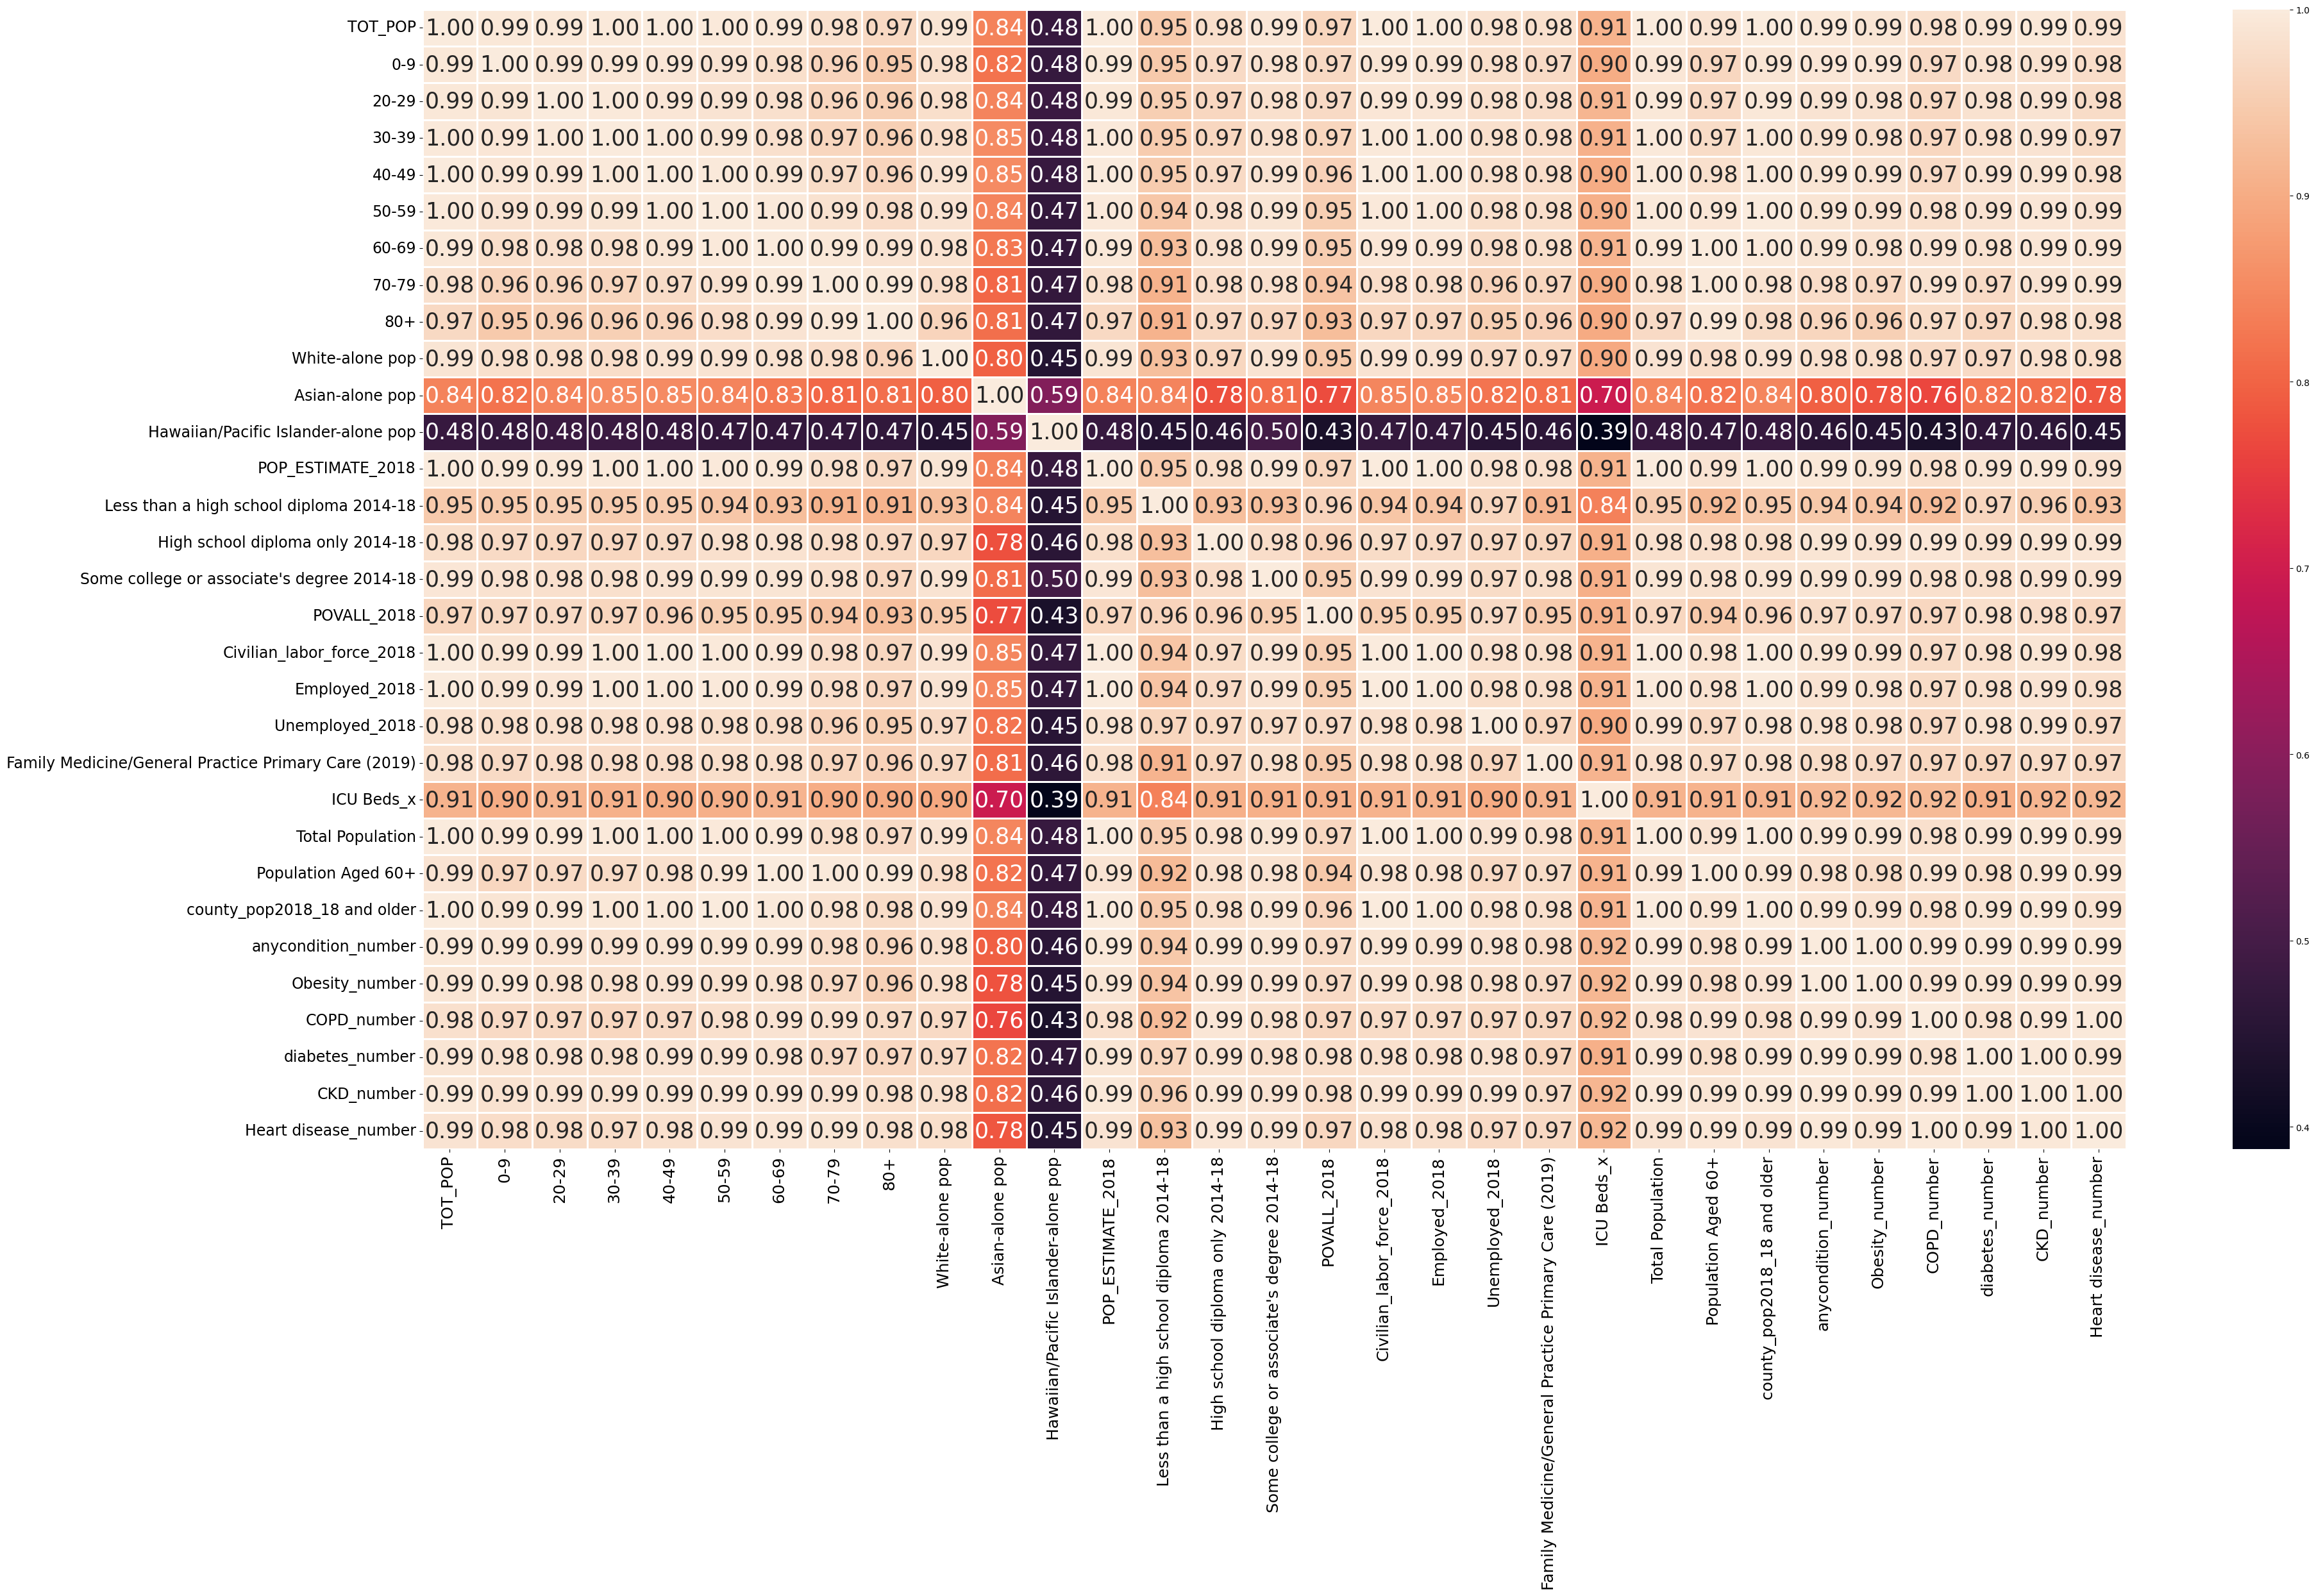

In [26]:
#correlacion


correlation_matrix = df2.corr()

# Visualizar la matriz de correlación usando un heatmap
fig, axis = plt.subplots(figsize=(40,25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linecolor='white', linewidths=1, annot_kws={"size": 25})
plt.xticks(fontsize=18)
plt.yticks(fontsize=17)
plt.tight_layout()
plt.show()

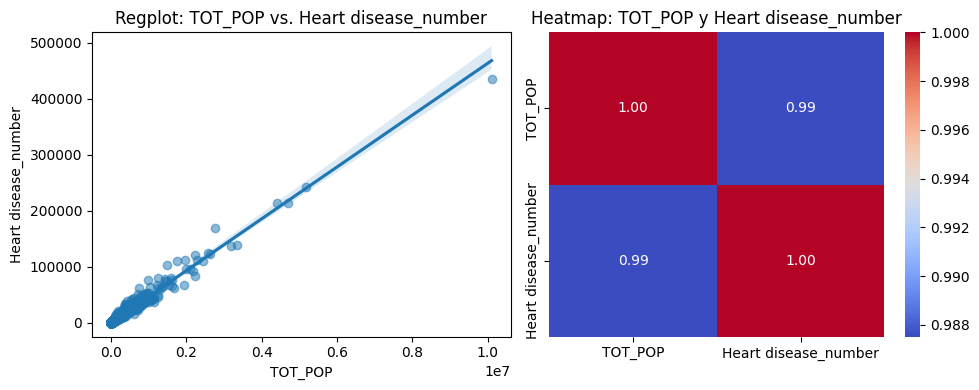

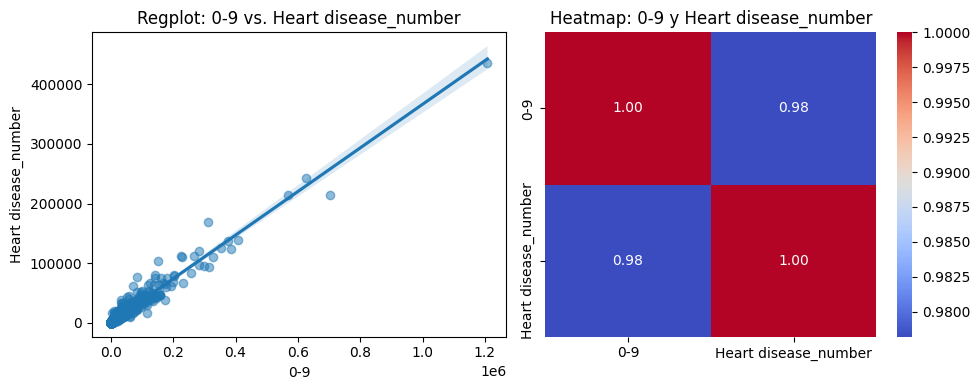

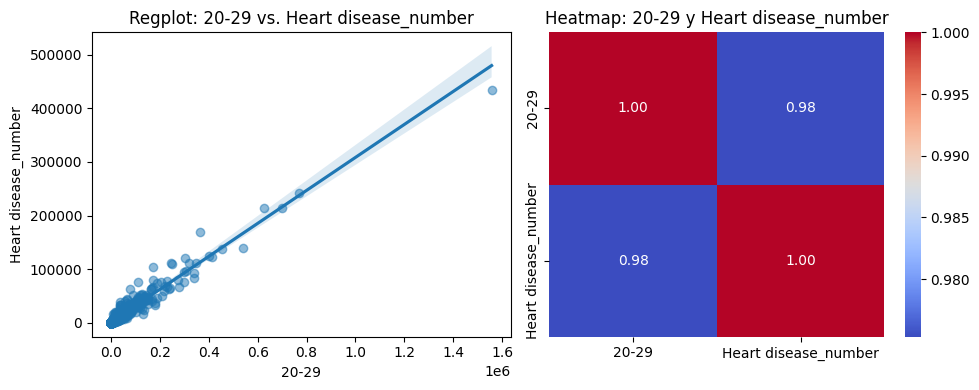

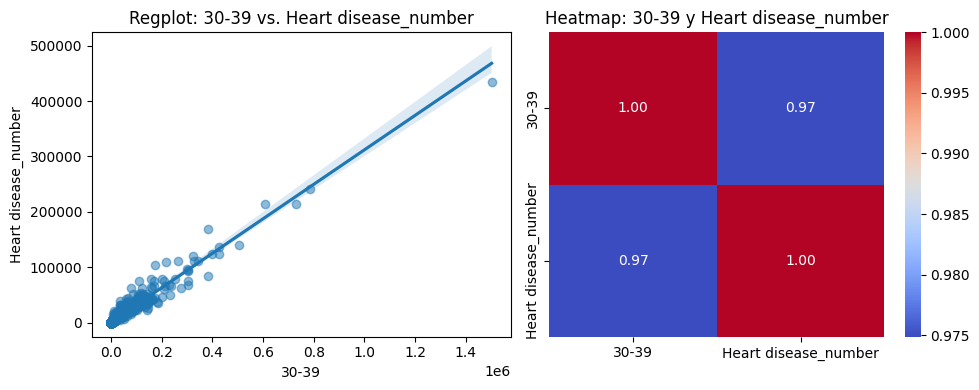

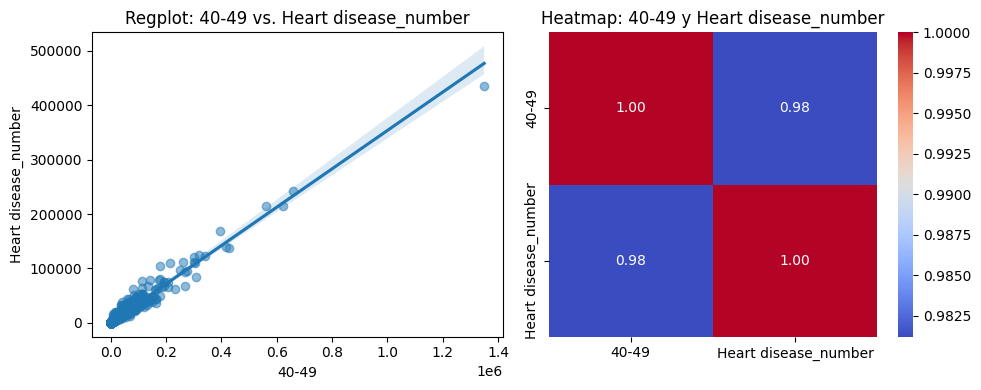

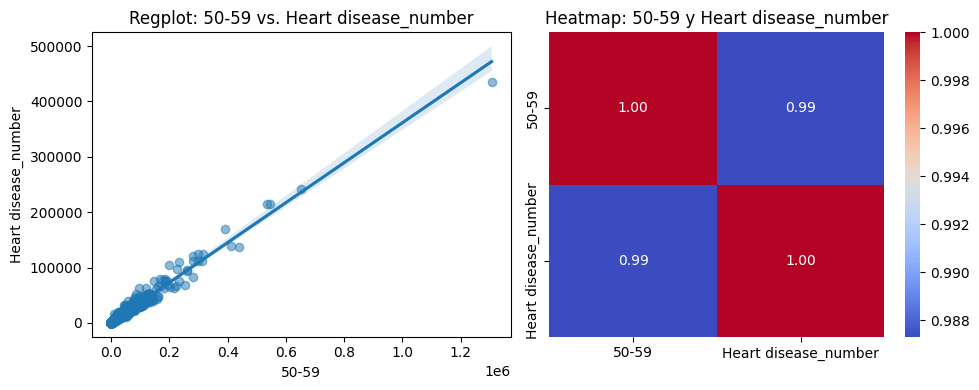

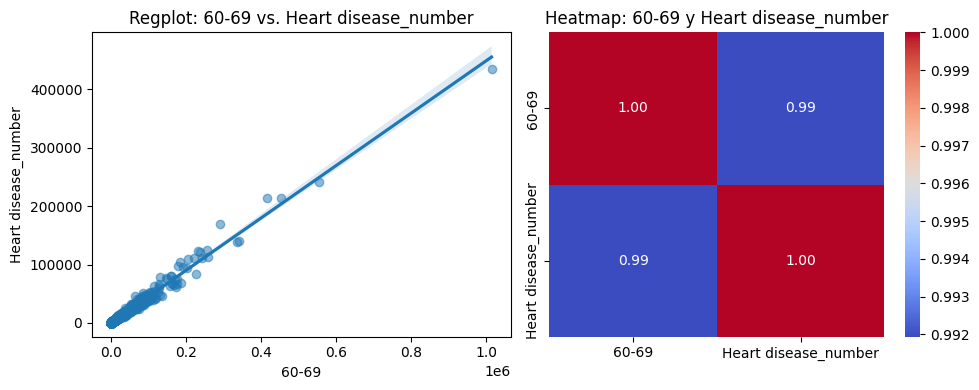

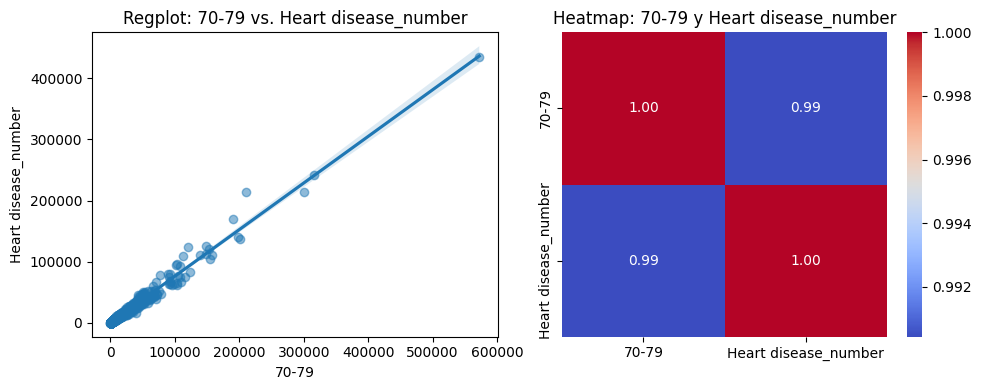

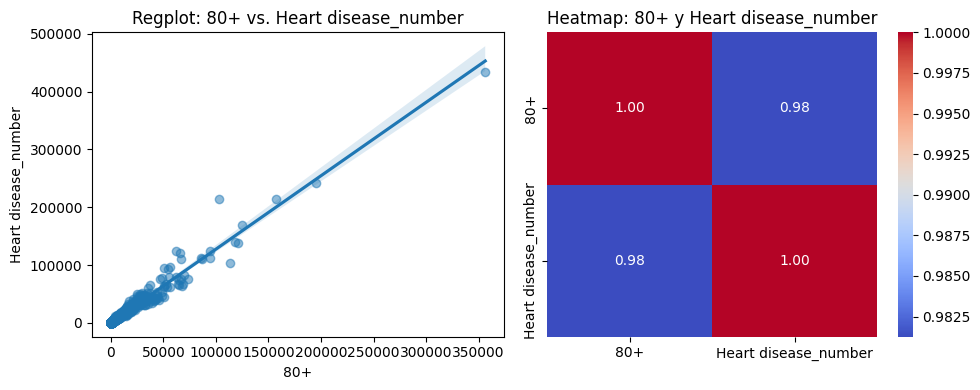

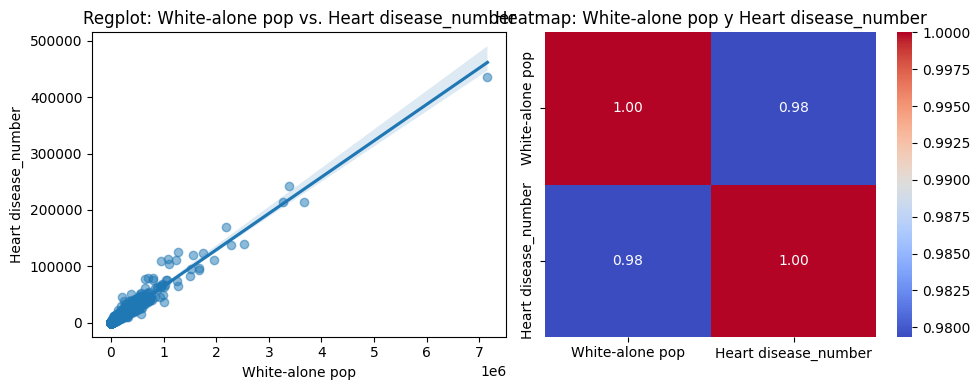

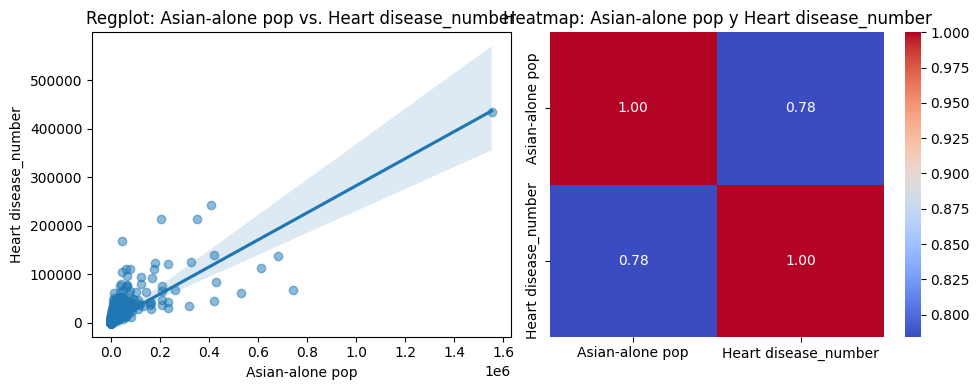

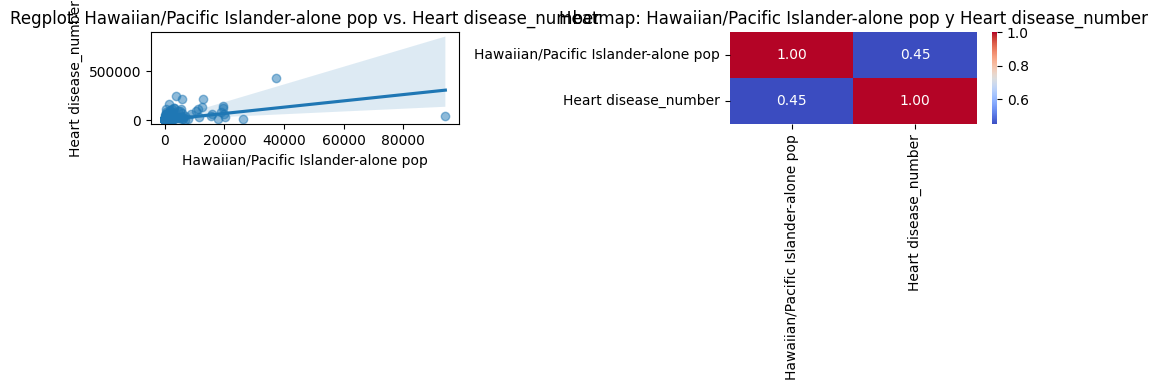

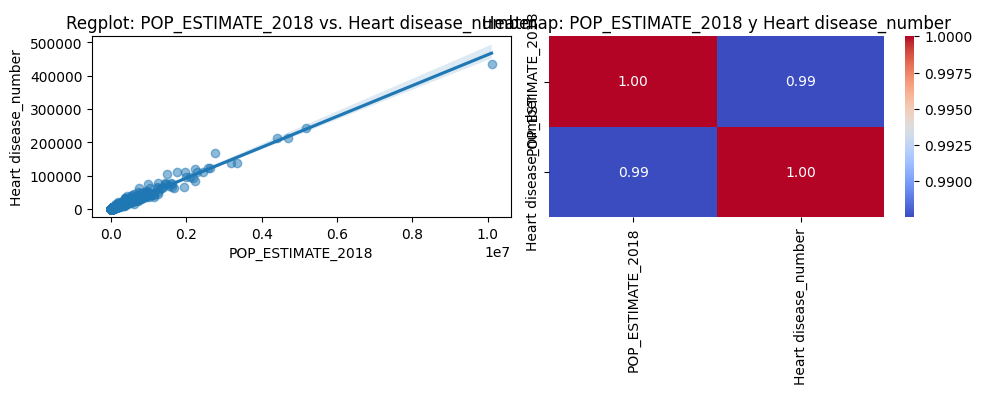

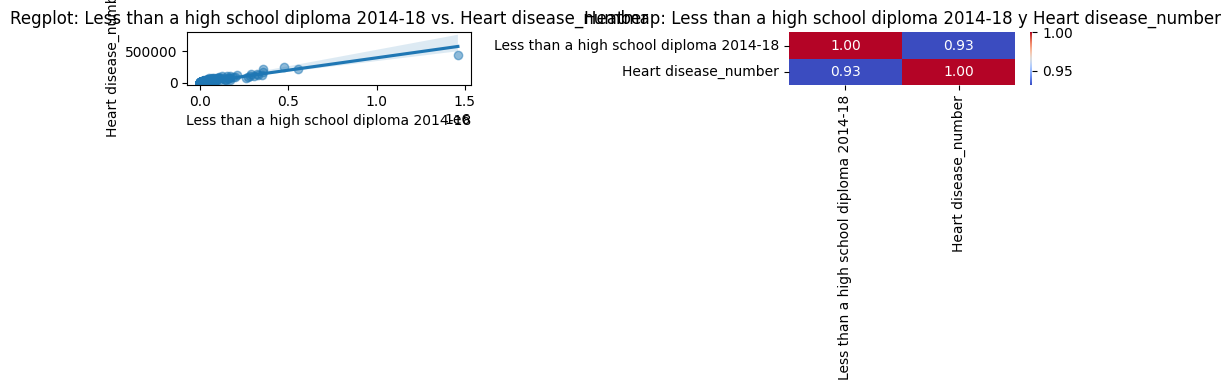

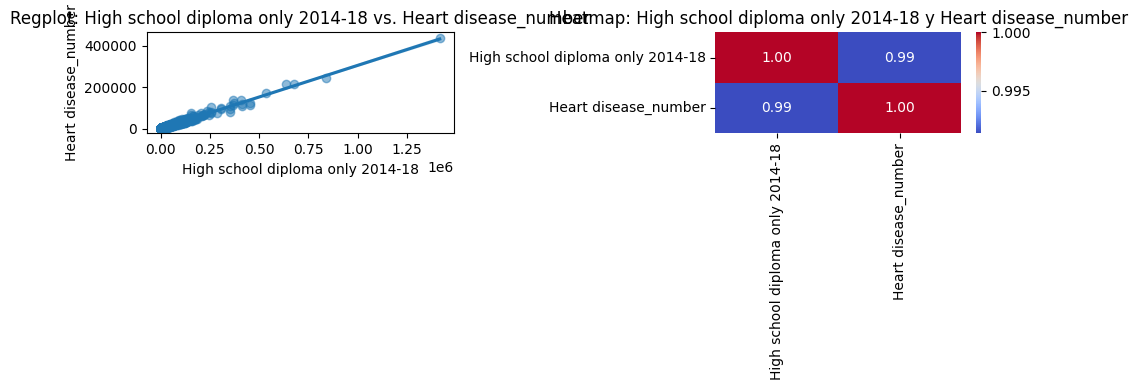

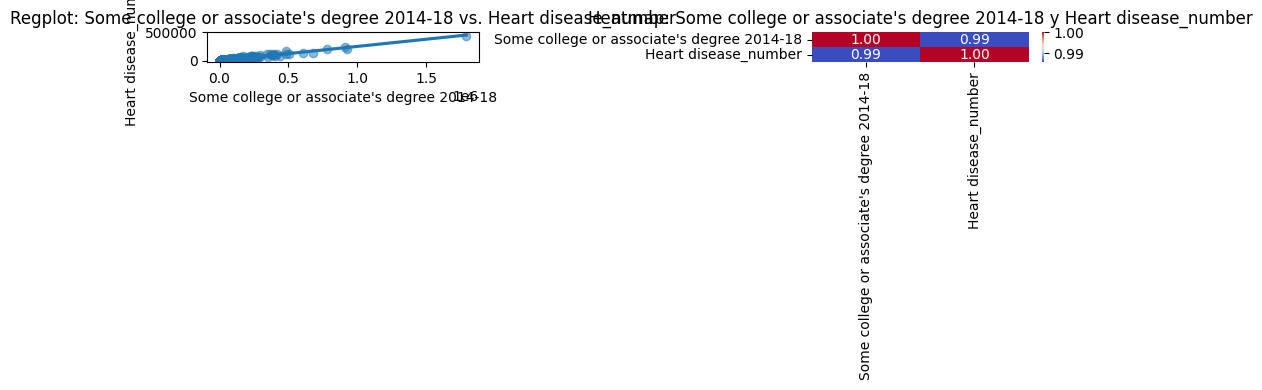

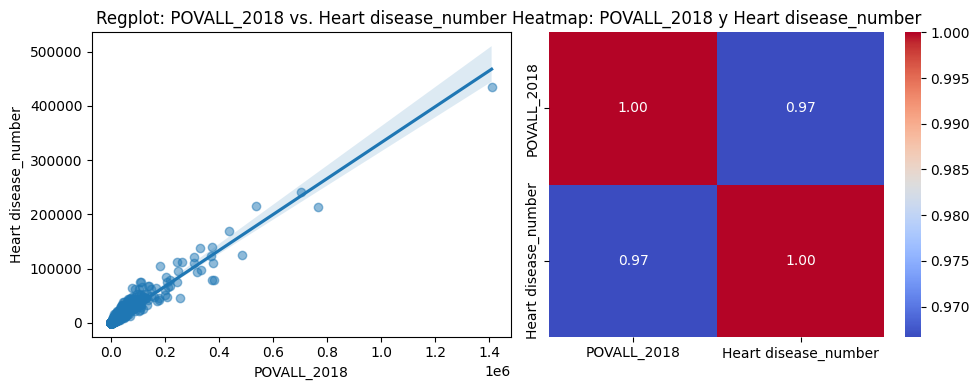

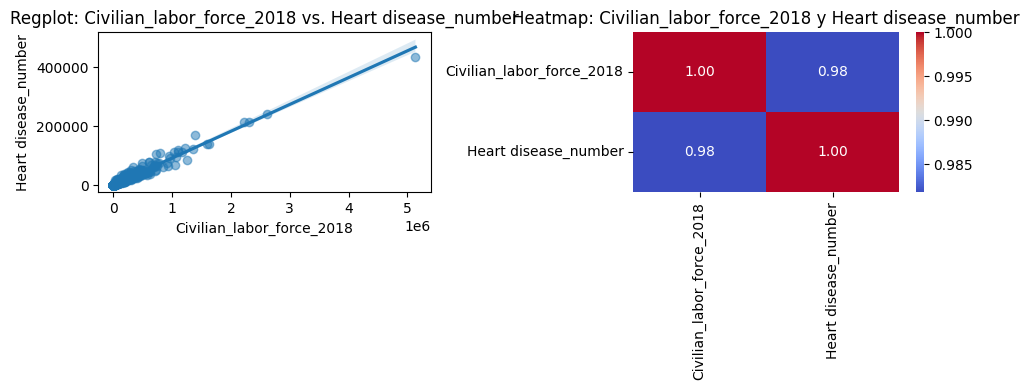

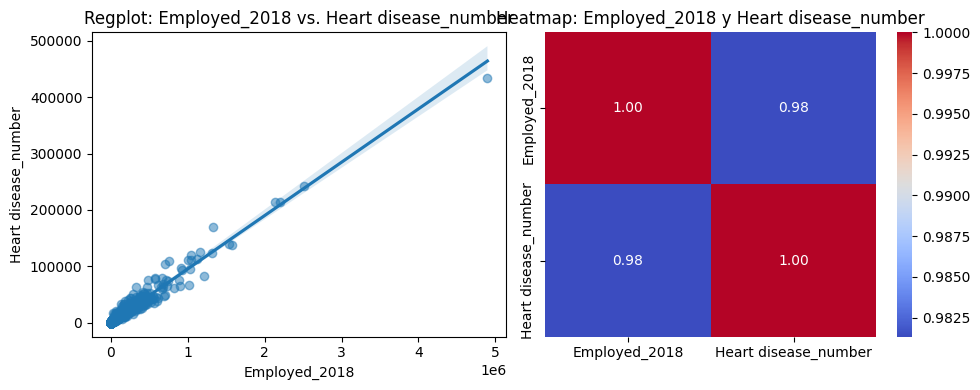

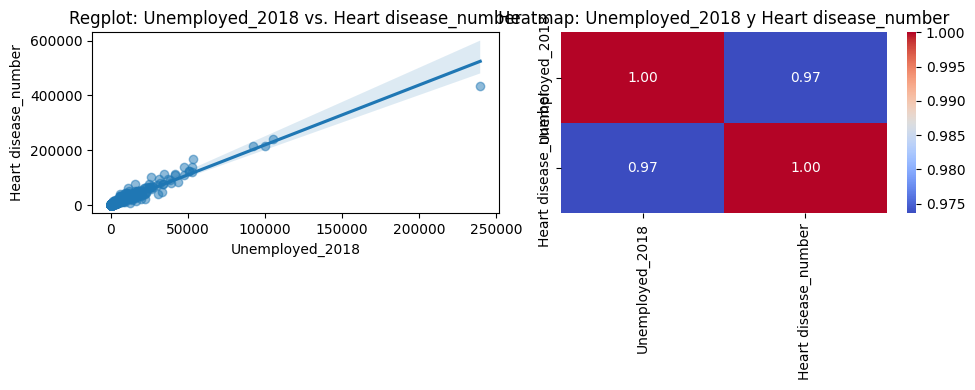

/tmp/ipykernel_19496/2604814857.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


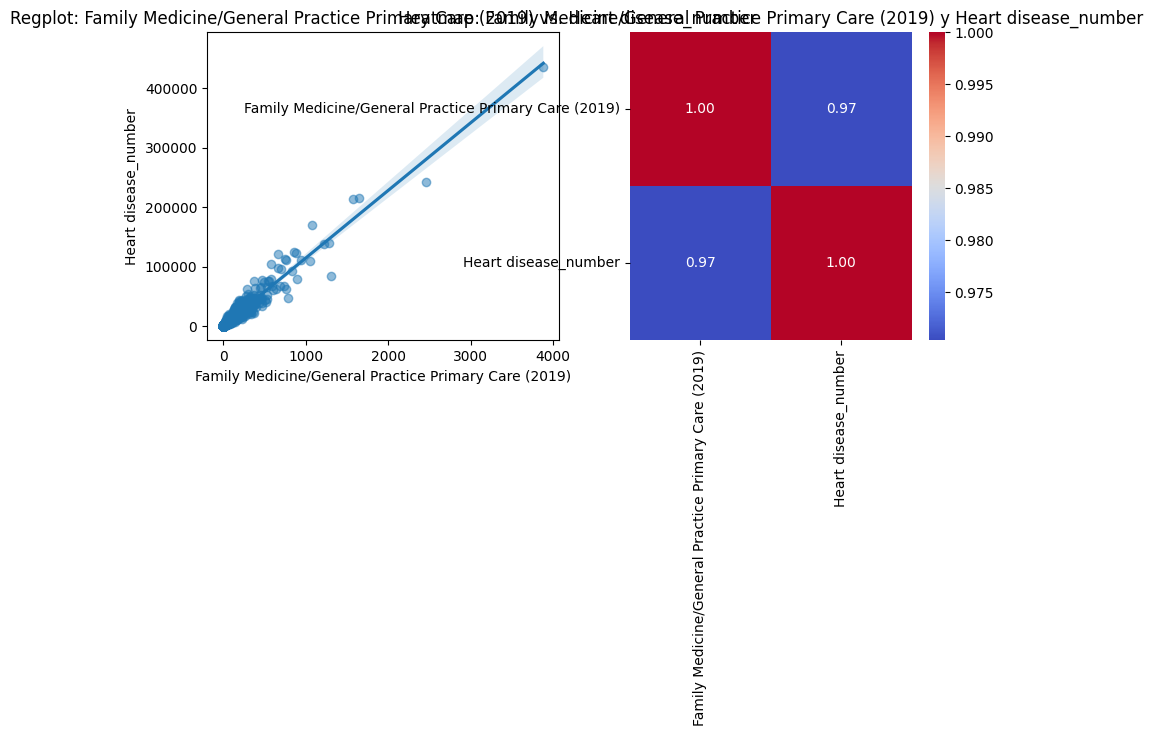

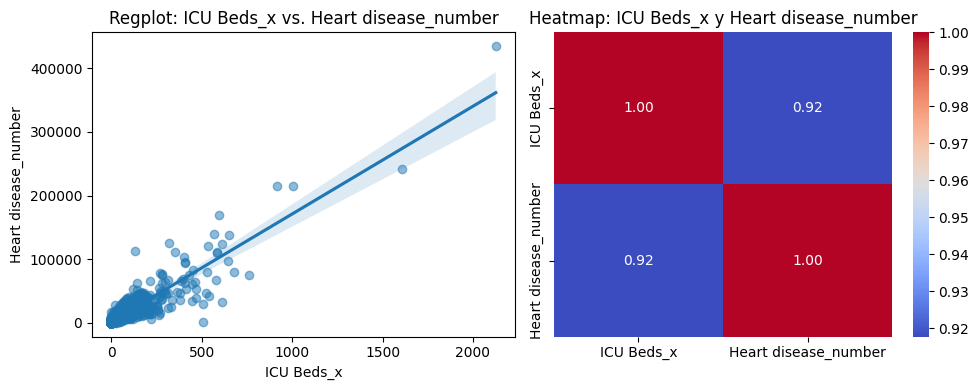

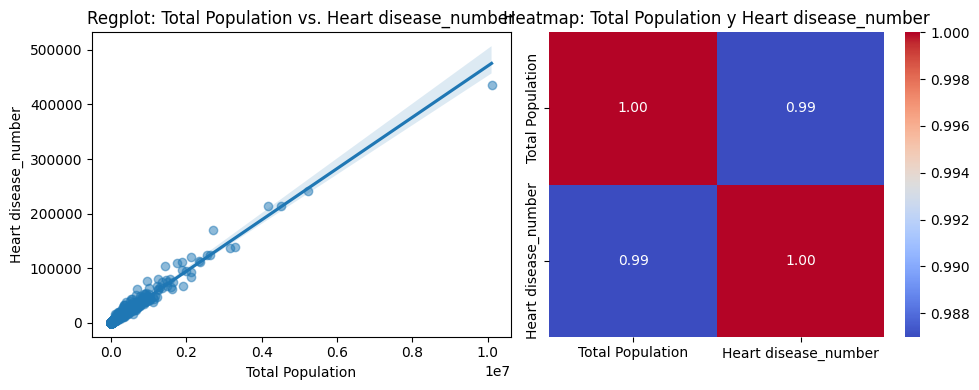

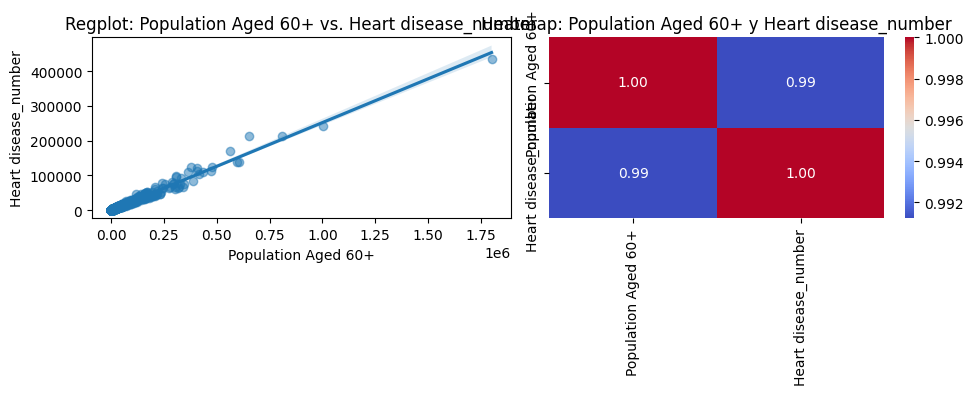

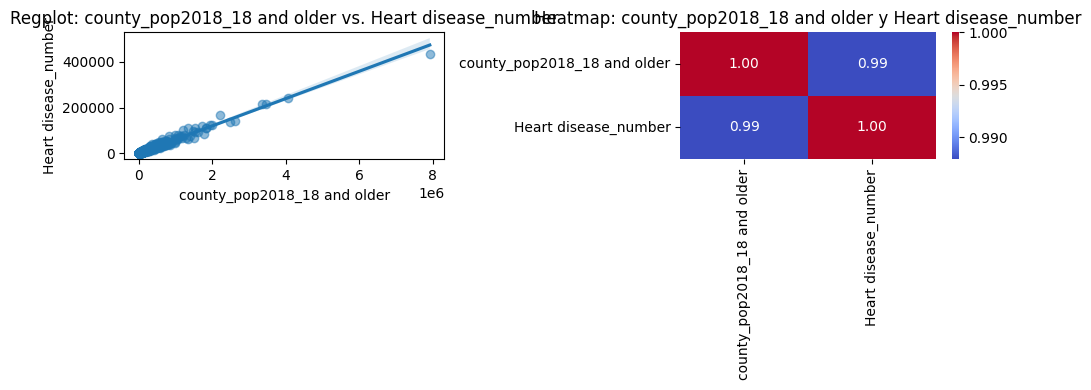

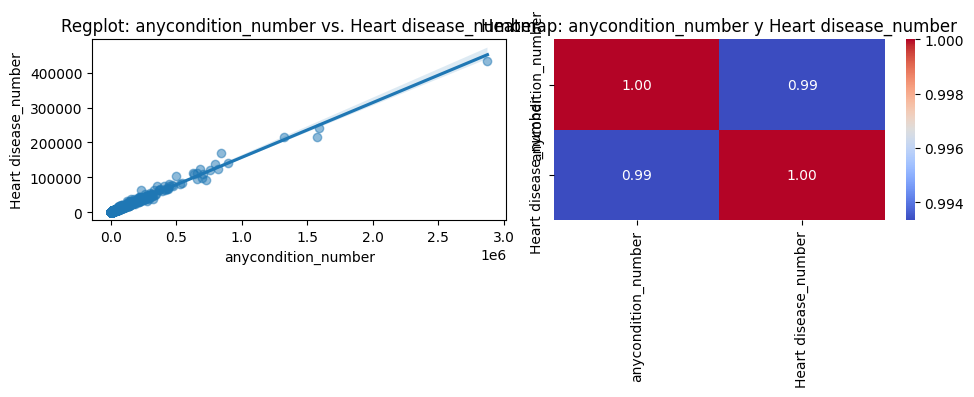

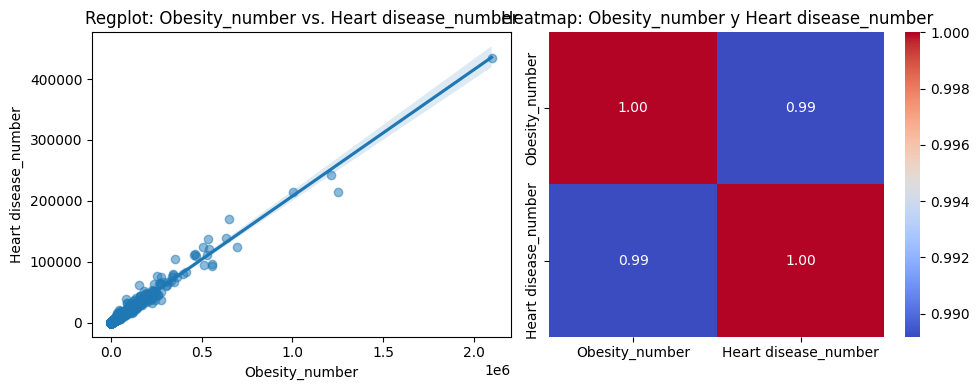

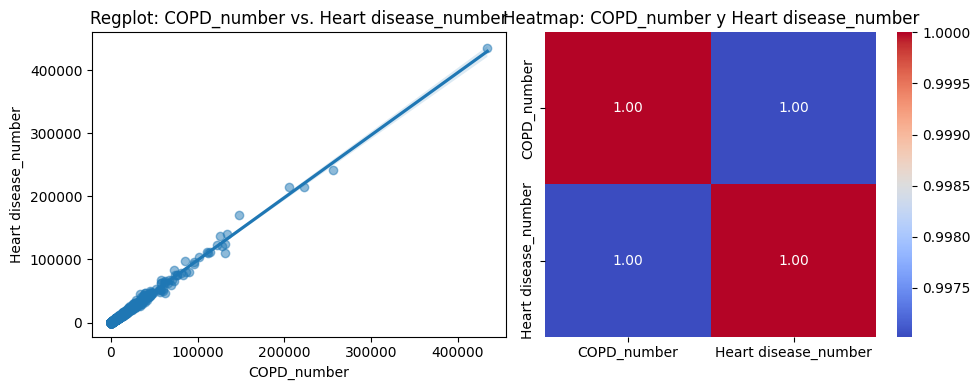

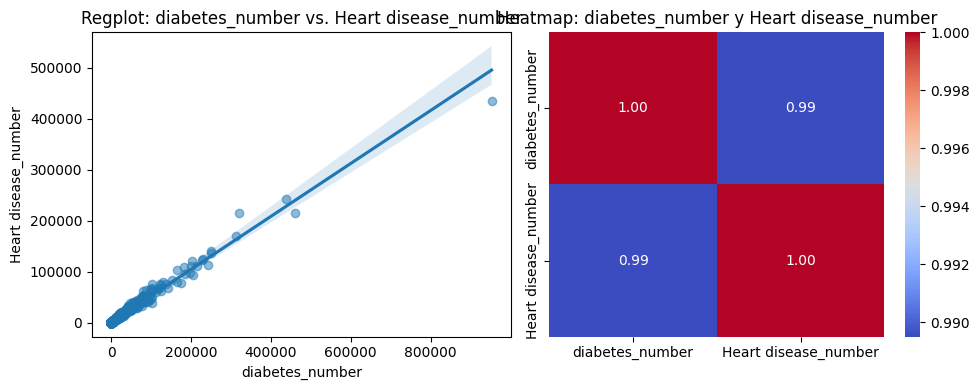

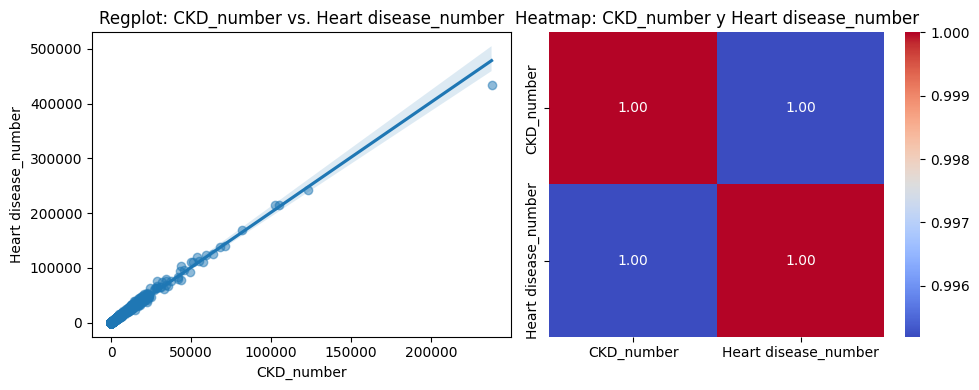

In [27]:
for column in df2.columns:
    if column != 'Heart disease_number':
        plt.figure(figsize=(10, 4)) 
        
        # Regplot 
        plt.subplot(1, 2, 1)  
        sns.regplot(data=df2, x=column, y='Heart disease_number', scatter_kws={'alpha': 0.5})
        plt.title(f'Regplot: {column} vs. Heart disease_number')
        plt.xlabel(column)
        plt.ylabel('Heart disease_number')

        # Heatmap 
        plt.subplot(1, 2, 2)  
        sns.heatmap(df2[[column, 'Heart disease_number']].corr(), annot=True, fmt= ".2f", cmap='coolwarm')
        plt.title(f'Heatmap: {column} y Heart disease_number')

        plt.tight_layout()  
        plt.show()


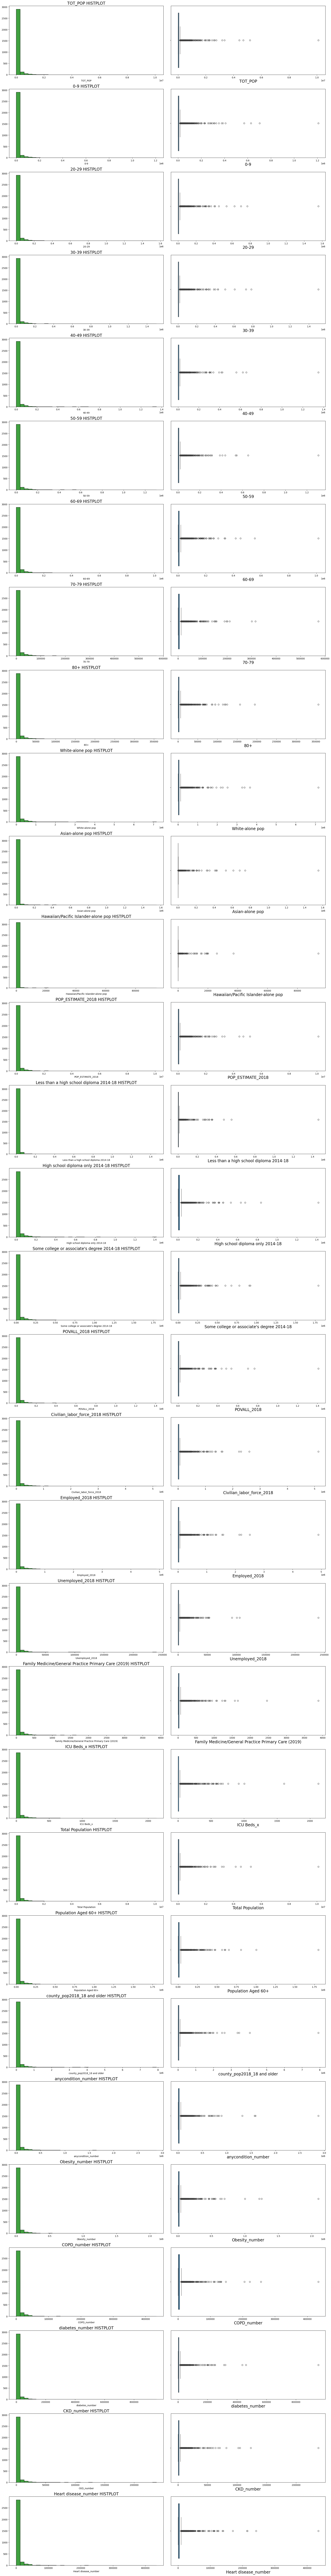

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features
features = [
    'TOT_POP', '0-9', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
    'White-alone pop', 'Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop',
    'POP_ESTIMATE_2018', 'Less than a high school diploma 2014-18',
    'High school diploma only 2014-18', 'Some college or associate\'s degree 2014-18',
    'POVALL_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
    'Family Medicine/General Practice Primary Care (2019)', 'ICU Beds_x',
    'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
    'anycondition_number', 'Obesity_number', 'COPD_number', 'diabetes_number', 'CKD_number','Heart disease_number'
]



fig, axes = plt.subplots(len(features), 2, figsize=(20, 5*len(features)))

for i, feature in enumerate(features):
    # Histogram
    sns.histplot(ax=axes[i, 0], data=df2, x=feature, bins=35, color='green').set(ylabel=None)
    axes[i, 0].set_title(f'{feature} HISTPLOT', fontdict={'fontsize': 17})
    
    # Box plot
    sns.boxplot(ax=axes[i, 1], data=df2, x=feature)
    axes[i, 1].set_xlabel(feature, fontsize=17)

plt.tight_layout()
plt.show()

In [29]:
clean_data1 = df2[['TOT_POP', '0-9', '20-29', '30-39', '40-49', '50-59', '60-69','70-79','80+','White-alone pop']]
clean_data1.describe()

TOT_POP           0-9         20-29         30-39         40-49  \
count  3.140000e+03  3.140000e+03  3.140000e+03  3.140000e+03  3.140000e+03   
mean   1.041894e+05  1.274030e+04  1.446933e+04  1.391649e+04  1.288521e+04   
std    3.335834e+05  4.180730e+04  4.957773e+04  4.899095e+04  4.347219e+04   
min    8.800000e+01  0.000000e+00  0.000000e+00  1.100000e+01  4.000000e+00   
25%    1.096325e+04  1.280500e+03  1.263750e+03  1.232750e+03  1.245250e+03   
50%    2.580050e+04  3.057000e+03  3.108000e+03  3.000500e+03  3.048500e+03   
75%    6.791300e+04  8.097000e+03  8.976250e+03  8.314250e+03  8.120500e+03   
max    1.010552e+07  1.208253e+06  1.557073e+06  1.501844e+06  1.350076e+06   

              50-59         60-69          70-79            80+  \
count  3.140000e+03  3.140000e+03    3140.000000    3140.000000   
mean   1.363803e+04  1.191621e+04    7220.310510    4035.541720   
std    4.272063e+04  3.451858e+04   20287.498429   12063.782251   
min    1.400000e+01  2.000000e+01       6.000000       0.000000   
25%    1.483000e+03  1.476500e+03     950.750000     533.000000   
50%    3.515500e+03  3.410000e+03    2177.000000    1160.000000   
75%    9.157250e+03  8.710500e+03    5574.000000    2899.750000   
max    1.306003e+06  1.014325e+06  572530.000000  356275.000000   

       White-alone pop  
count     3.140000e+03  
mean      7.965979e+04  
std       2.372880e+05  
min       2.400000e+01  
25%       9.008750e+03  
50%       2.206900e+04  
75%       5.898575e+04  
max       7.151444e+06

In [30]:
import pandas as pd

# Supongamos que 'clean_data1' es tu DataFrame
# Definir las variables de interés
columns_of_interest = ['TOT_POP','0-9', '20-29', '30-39', '40-49', '50-59','70-79', '60-69','80+','White-alone pop']

# Seleccionar estadísticas de interés (percentiles 25% y 75%)
age_stats = clean_data1[columns_of_interest].describe().loc[['25%', '75%']]

# Calcular los límites y el rango intercuartílico para cada variable
for column in age_stats.columns:
    # Calcular el rango intercuartílico (IQR)
    age_iqr = age_stats.loc['75%', column] - age_stats.loc['25%', column]
    # Calcular los límites superior e inferior para la detección de valores atípicos
    upper_limit = age_stats.loc['75%', column] + 1.5 * age_iqr
    lower_limit = age_stats.loc['25%', column] - 1.5 * age_iqr

    # Imprimir los resultados
    print(f"Para la variable '{column}', los límites superior e inferior para la búsqueda de valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

Para la variable 'TOT_POP', los límites superior e inferior para la búsqueda de valores atípicos son 153337.62 y -74461.38, con un rango intercuartílico de 56949.75
Para la variable '0-9', los límites superior e inferior para la búsqueda de valores atípicos son 18321.75 y -8944.25, con un rango intercuartílico de 6816.5
Para la variable '20-29', los límites superior e inferior para la búsqueda de valores atípicos son 20545.0 y -10305.0, con un rango intercuartílico de 7712.5
Para la variable '30-39', los límites superior e inferior para la búsqueda de valores atípicos son 18936.5 y -9389.5, con un rango intercuartílico de 7081.5
Para la variable '40-49', los límites superior e inferior para la búsqueda de valores atípicos son 18433.38 y -9067.62, con un rango intercuartílico de 6875.25
Para la variable '50-59', los límites superior e inferior para la búsqueda de valores atípicos son 20668.62 y -10028.38, con un rango intercuartílico de 7674.25
Para la variable '70-79', los límites supe

In [31]:
from statistics import mode

# Definir una lista de columnas para las cuales deseas calcular el modo y realizar el reemplazo
columns_to_process = ['TOT_POP','0-9', '20-29', '30-39', '40-49', '50-59', '60-69','70-79','80+','White-alone pop']

# Calcular el modo y reemplazar valores mayores que el límite superior con el modo correspondiente para cada columna
for column in columns_to_process:
    mode_column = clean_data1[column].mode()[0]  # Calcular el modo para la columna actual
    upper_limit = clean_data1[column].quantile(0.75) + 1.5 * (clean_data1[column].quantile(0.75) - clean_data1[column].quantile(0.25))

    # Reemplazar valores mayores que el límite superior con el modo correspondiente para la columna actual
    clean_data1[column] = clean_data1[column].apply(lambda x: mode_column if x > upper_limit else x)

    # Imprimir la cuenta de ocurrencias de cada valor después del reemplazo para la columna actual
    print(f"Valores para la columna '{column}':")
    print(clean_data1[column].value_counts())
    print()

# Imprimir el valor máximo para cada columna después del reemplazo
print("Valor máximo para cada columna después del reemplazo:")
print(clean_data1[columns_to_process].max())

Valores para la columna 'TOT_POP':
TOT_POP
14523    435
21741      2
42733      2
13280      2
5506       2
        ... 
12362      1
19404      1
31191      1
11323      1
6967       1
Name: count, Length: 2642, dtype: int64

Valores para la columna '0-9':
0-9
331     433
454       4
834       4
1276      4
715       4
       ... 
2143      1
2426      1
6086      1
7624      1
780       1
Name: count, Length: 2296, dtype: int64

Valores para la columna '20-29':
20-29
374     442
1502      4
1382      4
1312      4
2009      4
       ... 
5481      1
1930      1
232       1
7494      1
681       1
Name: count, Length: 2265, dtype: int64

Valores para la columna '30-39':
30-39
532     435
842       4
912       4
667       4
1340      4
       ... 
3729      1
4199      1
2483      1
863       1
2702      1
Name: count, Length: 2278, dtype: int64

Valores para la columna '40-49':
40-49
389     437
642       4
631       4
1503      4
711       4
       ... 
3899      1
1950      1
3961  

/tmp/ipykernel_19496/1647976215.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data1[column] = clean_data1[column].apply(lambda x: mode_column if x > upper_limit else x)
/tmp/ipykernel_19496/1647976215.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data1[column] = clean_data1[column].apply(lambda x: mode_column if x > upper_limit else x)
/tmp/ipykernel_19496/1647976215.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [32]:
# Seleccionar las columnas de interés
columns_of_interest2 = ['Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop', 'POP_ESTIMATE_2018',
                       'Less than a high school diploma 2014-18', 'High school diploma only 2014-18',
                       'Some college or associate\'s degree 2014-18', 'POVALL_2018',
                       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018']
clean_data2=df2[columns_of_interest2]
# Obtener una nueva DataFrame solo con las columnas de interés
clean_data2.describe()

Asian-alone pop  Hawaiian/Pacific Islander-alone pop  \
count     3.140000e+03                          3140.000000   
mean      6.155618e+03                           254.561783   
std       4.388798e+04                          2192.079705   
min       0.000000e+00                             0.000000   
25%       5.700000e+01                             5.000000   
50%       1.770000e+02                            16.000000   
75%       8.662500e+02                            69.000000   
max       1.551894e+06                         94079.000000   

       POP_ESTIMATE_2018  Less than a high school diploma 2014-18  \
count       3.140000e+03                             3.140000e+03   
mean        1.041894e+05                             8.581987e+03   
std         3.335834e+05                             3.723815e+04   
min         8.800000e+01                             4.000000e+00   
25%         1.096325e+04                             9.927500e+02   
50%         2.580050e+04                             2.497000e+03   
75%         6.791300e+04                             5.751000e+03   
max         1.010552e+07                             1.460718e+06   

       High school diploma only 2014-18  \
count                      3.140000e+03   
mean                       1.887329e+04   
std                        5.082858e+04   
min                        1.500000e+01   
25%                        2.803750e+03   
50%                        6.407500e+03   
75%                        1.521275e+04   
max                        1.416482e+06   

       Some college or associate's degree 2014-18   POVALL_2018  \
count                                3.140000e+03  3.140000e+03   
mean                                 2.017919e+04  1.332831e+04   
std                                  6.086391e+04  4.560973e+04   
min                                  2.400000e+01  0.000000e+00   
25%                                  2.295250e+03  1.597000e+03   
50%                                  5.325500e+03  3.769500e+03   
75%                                  1.441225e+04  9.397250e+03   
max                                  1.790808e+06  1.409155e+06   

       Civilian_labor_force_2018  Employed_2018  Unemployed_2018  
count               3.140000e+03   3.140000e+03      3140.000000  
mean                5.147558e+04   4.947048e+04      2005.100318  
std                 1.687896e+05   1.619570e+05      6971.115396  
min                 0.000000e+00   0.000000e+00         0.000000  
25%                 4.921000e+03   4.714500e+03       200.750000  
50%                 1.158300e+04   1.111500e+04       483.000000  
75%                 3.163700e+04   3.034400e+04      1276.250000  
max                 5.136341e+06   4.896512e+06    239829.000000

In [33]:
# Ver valores NaN en la columna 'Civilian_labor_force_2018'
nan_values_civilian_labor_force_2018 = df2['Civilian_labor_force_2018'].isna().sum()

# Imprimir los valores NaN en la columna 'Civilian_labor_force_2018'
print("Valores NaN en la columna 'Civilian_labor_force_2018':")
print(nan_values_civilian_labor_force_2018)

Valores NaN en la columna 'Civilian_labor_force_2018':
0


In [34]:
nan_values_civilian_labor_force_2018 = df2['Civilian_labor_force_2018'].isnull().sum()
nan_values_civilian_labor_force_2018

0

In [35]:
column_names = clean_data2.columns
print(column_names)

Index(['Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop',
       'POP_ESTIMATE_2018', 'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18', 'POVALL_2018',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018'],
      dtype='object')


In [36]:
import pandas as pd

# Lista de columnas de interés
columns_of_interest2 = ['Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop', 'POP_ESTIMATE_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', 'Some college or associate\'s degree 2014-18', 'POVALL_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018']

# Estadísticas descriptivas para las columnas de interés
age_stat1 = clean_data2[columns_of_interest2].describe().loc[['25%', '75%']]

# Calcular los límites y el rango intercuartílico para cada variable
for column in columns_of_interest2:
    # Calcular el rango intercuartílico (IQR)
    age_iqr = age_stat1.loc['75%', column] - age_stat1.loc['25%', column]
    # Calcular los límites superior e inferior para la detección de valores atípicos
    upper_limit = age_stat1.loc['75%', column] + 1.5 * age_iqr
    lower_limit = age_stat1.loc['25%', column] - 1.5 * age_iqr

    # Imprimir los resultados
    print(f"Para la variable '{column}', los límites superior e inferior para la búsqueda de valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

Para la variable 'Asian-alone pop', los límites superior e inferior para la búsqueda de valores atípicos son 2080.12 y -1156.88, con un rango intercuartílico de 809.25
Para la variable 'Hawaiian/Pacific Islander-alone pop', los límites superior e inferior para la búsqueda de valores atípicos son 165.0 y -91.0, con un rango intercuartílico de 64.0
Para la variable 'POP_ESTIMATE_2018', los límites superior e inferior para la búsqueda de valores atípicos son 153337.62 y -74461.38, con un rango intercuartílico de 56949.75
Para la variable 'Less than a high school diploma 2014-18', los límites superior e inferior para la búsqueda de valores atípicos son 12888.38 y -6144.62, con un rango intercuartílico de 4758.25
Para la variable 'High school diploma only 2014-18', los límites superior e inferior para la búsqueda de valores atípicos son 33826.25 y -15809.75, con un rango intercuartílico de 12409.0
Para la variable 'Some college or associate's degree 2014-18', los límites superior e inferior

In [39]:
from statistics import mode

# Definir una lista de columnas para las cuales deseas calcular el modo y realizar el reemplazo
columns_to_process = ['Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop', 'POP_ESTIMATE_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', 'Some college or associate\'s degree 2014-18','POVALL_2018', 'Civilian_labor_force_2018','Employed_2018','Unemployed_2018']

# Calcular el modo y reemplazar valores mayores que el límite superior con el modo correspondiente para cada columna
for column in columns_to_process:
    # Calcular el modo para la columna actual
    mode_values = clean_data2[column].mode()
    if len(mode_values) > 0:
        mode_column = mode_values[0]
    else:
        # Si no hay modo (por ejemplo, todos los valores son únicos), usar el primer valor encontrado
        mode_column = clean_data2[column].iloc[0]
    
    upper_limit = clean_data2[column].quantile(0.75) + 1.5 * (clean_data2[column].quantile(0.75) - clean_data2[column].quantile(0.25))

    # Reemplazar valores mayores que el límite superior con el modo correspondiente para la columna actual
    clean_data2[column] = clean_data2[column].apply(lambda x: mode_column if x > upper_limit else x)

    # Imprimir la cuenta de ocurrencias de cada valor después del reemplazo para la columna actual
    print(f"Valores para la columna '{column}':")
    print(clean_data2[column].value_counts())
    print()

# Imprimir el valor máximo para cada columna después del reemplazo
print("Valor máximo para cada columna después del reemplazo:")
print(clean_data2[columns_to_process].max())

Valores para la columna 'Asian-alone pop':
Asian-alone pop
31      549
5        23
26       22
4        21
22       21
       ... 
319       1
297       1
1053      1
1274      1
326       1
Name: count, Length: 829, dtype: int64

Valores para la columna 'Hawaiian/Pacific Islander-alone pop':
Hawaiian/Pacific Islander-alone pop
0      683
1      172
2      150
3      116
4      112
      ... 
165      1
120      1
119      1
152      1
133      1
Name: count, Length: 163, dtype: int64

Valores para la columna 'POP_ESTIMATE_2018':
POP_ESTIMATE_2018
14523    435
21741      2
42733      2
13280      2
5506       2
        ... 
12362      1
19404      1
31191      1
11323      1
6967       1
Name: count, Length: 2642, dtype: int64

Valores para la columna 'Less than a high school diploma 2014-18':
Less than a high school diploma 2014-18
396     343
123       4
2031      4
972       4
505       4
       ... 
9106      1
8911      1
1969      1
1521      1
2549      1
Name: count, Length: 22

/tmp/ipykernel_19496/2639200435.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data2[column] = clean_data2[column].apply(lambda x: mode_column if x > upper_limit else x)
/tmp/ipykernel_19496/2639200435.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data2[column] = clean_data2[column].apply(lambda x: mode_column if x > upper_limit else x)
/tmp/ipykernel_19496/2639200435.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [40]:
# Seleccionar las columnas de interés
columns_of_interest3 = ['Family Medicine/General Practice Primary Care (2019)', 'ICU Beds_x',
    'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
    'anycondition_number', 'Obesity_number', 'COPD_number', 'diabetes_number', 'CKD_number','Heart disease_number']
clean_data3=df2[columns_of_interest3]
# Obtener una nueva DataFrame solo con las columnas de interés
clean_data3.describe()

Family Medicine/General Practice Primary Care (2019)   ICU Beds_x  \
count                                        3140.000000     3140.000000   
mean                                           44.393892       23.817516   
std                                           133.348667       84.602028   
min                                             0.030356        0.000000   
25%                                             5.312558        0.000000   
50%                                            12.153987        0.000000   
75%                                            31.312501       12.000000   
max                                          3882.586846     2126.000000   

       Total Population  Population Aged 60+  county_pop2018_18 and older  \
count      3.140000e+03         3.140000e+03                 3.140000e+03   
mean       1.022266e+05         2.132298e+04                 8.081460e+04   
std        3.283878e+05         6.140588e+04                 2.585190e+05   
min        7.400000e+01         2.700000e+01                 8.800000e+01   
25%        1.096700e+04         2.814750e+03                 8.460250e+03   
50%        2.570400e+04         6.310000e+03                 2.023000e+04   
75%        6.750075e+04         1.610625e+04                 5.282025e+04   
max        1.010572e+07         1.800341e+06                 7.916625e+06   

       anycondition_number  Obesity_number    COPD_number  diabetes_number  \
count         3.140000e+03    3.140000e+03    3140.000000      3140.000000   
mean          3.338540e+04    2.527613e+04    5827.242357      9326.577707   
std           9.888669e+04    7.446684e+04   15720.551934     29754.601185   
min           4.100000e+01    2.500000e+01       7.000000        11.000000   
25%           4.215000e+03    3.075000e+03     815.000000      1187.750000   
50%           9.753000e+03    7.182500e+03    1963.500000      2743.000000   
75%           2.500125e+04    1.854250e+04    4727.000000      6679.250000   
max           2.877316e+06    2.097906e+06  434075.000000    952335.000000   

          CKD_number  Heart disease_number  
count    3140.000000           3140.000000  
mean     2466.234076           5597.593312  
std      7730.422067          15615.285499  
min         3.000000              7.000000  
25%       314.750000            798.500000  
50%       718.000000           1814.500000  
75%      1776.250000           4376.000000  
max    237766.000000         434790.000000

In [41]:
import pandas as pd


# Lista de columnas de interés
columns_of_interest3 = ['Family Medicine/General Practice Primary Care (2019)', 'ICU Beds_x',
    'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
    'anycondition_number', 'Obesity_number', 'COPD_number', 'diabetes_number', 'CKD_number','Heart disease_number']

# Estadísticas descriptivas para las columnas de interés
age_stat2 = clean_data3[columns_of_interest3].describe().loc[['25%', '75%']]  


# Calcular los límites y el rango intercuartílico para cada variable
for column in age_stat2.columns:
    # Calcular el rango intercuartílico (IQR)
    age_iqr = age_stat2.loc['75%', column] - age_stat2.loc['25%', column]
    # Calcular los límites superior e inferior para la detección de valores atípicos
    upper_limit = age_stat2.loc['75%', column] + 1.5 * age_iqr
    lower_limit = age_stat2.loc['25%', column] - 1.5 * age_iqr

    # Imprimir los resultados
    print(f"Para la variable '{column}', los límites superior e inferior para la búsqueda de valores atípicos son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

Para la variable 'Family Medicine/General Practice Primary Care (2019)', los límites superior e inferior para la búsqueda de valores atípicos son 70.31 y -33.69, con un rango intercuartílico de 26.0
Para la variable 'ICU Beds_x', los límites superior e inferior para la búsqueda de valores atípicos son 30.0 y -18.0, con un rango intercuartílico de 12.0
Para la variable 'Total Population', los límites superior e inferior para la búsqueda de valores atípicos son 152301.38 y -73833.62, con un rango intercuartílico de 56533.75
Para la variable 'Population Aged 60+', los límites superior e inferior para la búsqueda de valores atípicos son 36043.5 y -17122.5, con un rango intercuartílico de 13291.5
Para la variable 'county_pop2018_18 and older', los límites superior e inferior para la búsqueda de valores atípicos son 119360.25 y -58079.75, con un rango intercuartílico de 44360.0
Para la variable 'anycondition_number', los límites superior e inferior para la búsqueda de valores atípicos son 56

In [42]:
import pandas as pd

# Concatenar los DataFrames a lo largo del eje de las columnas
clean_data_sin_outliers = pd.concat([clean_data1, clean_data2, clean_data3], axis=1)
for column in clean_data_sin_outliers.columns:
    print(column)

TOT_POP
0-9
20-29
30-39
40-49
50-59
60-69
70-79
80+
White-alone pop
Asian-alone pop
Hawaiian/Pacific Islander-alone pop
POP_ESTIMATE_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
POVALL_2018
Civilian_labor_force_2018
Employed_2018
Unemployed_2018
Family Medicine/General Practice Primary Care (2019)
ICU Beds_x
Total Population
Population Aged 60+
county_pop2018_18 and older
anycondition_number
Obesity_number
COPD_number
diabetes_number
CKD_number
Heart disease_number


In [43]:
clean_data_sin_outliers.to_csv("../data/processed/clean_data_sin_outliers.csv", index = False)
X1 = clean_data_sin_outliers.drop('Heart disease_number', axis= 1)
y1 =clean_data_sin_outliers['Heart disease_number']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 28)
X_test1.head()

TOT_POP   0-9  20-29  30-39  40-49  50-59  60-69  70-79   80+  \
2223    67653  8363   8487   7792   7232   8498   9994   6348  2989   
1632     5972   819    674    666    594    793    814    478   368   
2088    14523   331    374    532    389   1635    488    246   296   
808     17556  1966   1705   1768   1802   2538   2804   1681  1196   
1078    13345  1297   1865   1888   1950   1793   1769    914   496   

      White-alone pop  ...  \
2223            59874  ...   
1632             4901  ...   
2088             2795  ...   
808             17131  ...   
1078            12463  ...   

      Family Medicine/General Practice Primary Care (2019)  ICU Beds_x  \
2223                                          31.931949              0   
1632                                           3.299960              0   
2088                                         198.814793            251   
808                                           12.020524              0   
1078                                           5.674400              0   

      Total Population  Population Aged 60+  county_pop2018_18 and older  \
2223             66018                18095                        52947   
1632              6081                 1684                         4540   
2088            433404                92861                       331337   
808              17711                 5374                        13851   
1078             13281                 3148                        10907   

      anycondition_number  Obesity_number  COPD_number  diabetes_number  \
2223                21311           16149         5173             6890   
1632                 1822            1385          370              562   
2088               159044          123589        31559            41730   
808                  6267            5236         1154             1691   
1078                 5930            4166         1612             1777   

      CKD_number  
2223        1974  
1632         162  
2088       10926  
808          482  
1078         423  

[5 rows x 30 columns]

In [44]:
scaler = StandardScaler()
scaler.fit(X_train1)

#normalize select data

X_train_norm = scaler.transform(X_train1)
X_test_norm = scaler.transform(X_test1)

In [45]:
X_train_norm

array([[-0.84486638, -0.83475804, -0.69891136, ..., -0.35130578,
        -0.28721942, -0.29519191],
       [ 1.16869079,  0.9655249 ,  0.94028963, ..., -0.06970584,
        -0.07135932, -0.05591258],
       [ 1.04984583,  1.10749887,  1.12557609, ..., -0.07166186,
        -0.10908414, -0.11687632],
       ...,
       [-0.50789785,  3.55316627,  3.52666931, ...,  0.47332676,
         0.20890219,  0.23962028],
       [-0.48718055, -0.41759342, -0.4752322 , ..., -0.28513822,
        -0.25131266, -0.2564335 ],
       [-0.02853898, -0.06942549, -0.12278253, ..., -0.20804392,
        -0.20330879, -0.19977625]])

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercep (a): [ 8.45979682e-12  1.41177391e-10  8.43600697e-11 ... -7.01033240e-10
 -7.07226987e-10 -6.56642196e-10]
Coefficients: [[ 6.76222413e-06 -1.20273272e-05 -1.43583487e-06 ... -2.70302372e-10
  -3.05986859e-07  3.86270097e-10]
 [-1.27609670e-06 -9.47427913e-06 -1.14050261e-06 ...  1.33215349e-09
  -2.36851914e-07  3.49315277e-10]
 [ 2.82030802e-06 -1.05069109e-05 -1.25700452e-06 ...  2.02017141e-10
  -2.65782975e-07  7.82155192e-10]
 ...
 [-2.34171510e-05  1.17803361e-05  2.75487328e-06 ... -2.35412751e-09
   1.00878144e-06 -2.35432921e-09]
 [-2.19844144e-05  5.11575428e-06 -3.51097154e-06 ... -2.40826782e-09
   3.54690141e-07 -2.10896862e-09]
 [-1.87921798e-05  8.23784801e-06 -5.11266980e-06 ... -2.18396012e-09
   1.06428587e-06 -1.93572111e-09]]


In [49]:
y_pred = model.predict(X_test)
y_pred

array([  4397,   1655,   2089,  11305,     61,   1655,   1164,   1050,
         8608,  12677,   4397,   2969,   4397,   2969,    153,   2089,
         4397,   1197,   1050,    317,    736,    317,    317,    317,
         2969,   2969,   1655,     61, 214586,    734,    734,    317,
          317,     52,   6919,    142,   1139,  11305,     61,    317,
        11305,   2089,   4397,   2969,    317,   1139,    317,   6026,
        29169,   4397,   4397,   4397,    734,     56,   4397,  79751,
          317,     52,   4397,     61,   1655,    317,  21729,   4397,
           61,    910,    103,   4397,    317,  11305,  28026,   2089,
          103,   2089,    317,   4397,   2969,  11305,  12677,   4397,
         4397,    450,     56,   2969,  53850,   2969,   1050,   1655,
        39688,  11305,  11305,  46347,  28026,  12677,    142,    160,
        67657,    317,   4397,    734,   1164,   1655,    317,    317,
          103,   1197,  47805,   4397,   2089,     52,   1197,   2969,
      

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 219205510.73726115
R2 Score: -0.1217535759367594


In [51]:
#Lasso model

lasso_model = Lasso(alpha=1.0, random_state = 28)
lasso_model.fit(X_train_norm, y_train)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.871e+11, tolerance: 6.425e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(random_state=28)

In [52]:
y_pred = lasso_model.predict(X_test_norm)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Metrics for the Lasso model:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')

Metrics for the Lasso model:
Mean Squared Error (MSE): 196928900.22523683
R2 Score: -0.007756133912752761


In [53]:
#ridge model
ridge_model = Ridge(alpha=1.0, random_state = 28)

ridge_model.fit(X_train, y_train)

y_pred2 = ridge_model.predict(X_test)
y_pred2

array([ 4.21282479e+03,  2.16136542e+03,  1.95186083e+03,  2.84625384e+04,
        1.63557654e+02,  1.94513459e+03,  1.56446126e+03,  3.73412637e+02,
        1.06669255e+04,  5.82988283e+03,  4.32413866e+03,  2.22676724e+03,
        7.30508854e+03,  3.11005091e+03,  5.08401462e+02,  2.16296948e+03,
        2.64080928e+03,  1.90004021e+03, -2.56175483e+01,  9.55832601e+02,
        1.66029945e+03,  6.43158208e+02,  5.92158019e+02,  9.09750777e+02,
        3.18413941e+03,  1.80308959e+03,  2.16050108e+03,  1.04017377e+02,
        9.60892386e+04,  1.00477641e+03,  9.29241013e+02,  8.48023404e+02,
        5.98182736e+02,  7.94133354e+02,  6.13894800e+03,  7.27144777e+02,
        1.88438455e+03,  1.44742159e+04,  2.42665923e+02,  3.45443334e+02,
        5.57957700e+03,  2.03165307e+03,  9.80183471e+03,  1.91758130e+03,
        9.88724620e+02,  1.30086393e+03,  4.54603552e+02,  5.22660922e+03,
        2.94715616e+04,  6.23604500e+03,  3.27893545e+03,  6.97220532e+03,
        1.32239988e+03,  

In [54]:
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print('Metrics for the Ridge model:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')

Metrics for the Ridge model:
Mean Squared Error (MSE): 537353.7143711318
R2 Score: 0.9972501674405384
